In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from datetime import datetime
from tqdm import tqdm

In [4]:
wkhr = pd.read_csv("week-hour-submissions.csv", names=['slot', 'value', 'inserted_at', 'pk'])
wkhr['inserted_at'] = pd.to_datetime(wkhr.inserted_at, format="%Y-%m-%d%H:%M:%S.%f")
wkhr.head()

,slot,value,inserted_at,pk
0,5821700,2193666741541027,2023-02-18 01:40:12.533538,0xb0e77c
1,5821700,25022323400819027,2023-02-18 01:40:12.791141,0xb0e77c
2,5821700,12264946791501133,2023-02-18 01:40:12.883725,0xa1defa
3,5821700,1539784306473133,2023-02-18 01:40:12.888181,0xa1dead
4,5821700,944375132223133,2023-02-18 01:40:12.895380,0xaa1488


In [55]:
len(wkhr)

31339

In [5]:
wkhr['inserted_at'][0]

Timestamp('2023-02-18 01:40:12.533538')

In [56]:
slots = list(set(wkhr.slot.values))
len(slots)

50

In [57]:
pks = list(set(wkhr.pk.values))
len(pks)

55

In [97]:
pkWeiPerMus = {}
for p in pks:
    pkWeiPerMus[p] = []

for sl in tqdm(slots[:]):
    slotdf = wkhr[wkhr['slot']==sl]
    for pk in pks[:]:
        pkdf = slotdf[slotdf['pk']==pk]
        vals = pkdf.value.values
        inserted = pkdf.inserted_at.values
        for i in range(len(vals)-1):
            delta = vals[i] - vals[i-1]
            if delta > 0:
                timeDelta = int(inserted[i] - inserted[i-1]) / 1000 # ns -> mus
                # print(delta, timeDelta, inserted[i], inserted[i-1])
                pkWeiPerMus[pk].append(delta / timeDelta)

100%|██████████| 50/50 [00:02<00:00, 23.17it/s]


In [99]:
total = []
for k in pkWeiPerMus.keys():
    total.extend(pkWeiPerMus[k])
total = np.asarray(total)
total.shape

(23077,)

In [100]:
total = total[total > np.percentile(total, 5)]
total = total[total < np.percentile(total, 95)]
total.shape

(20826,)

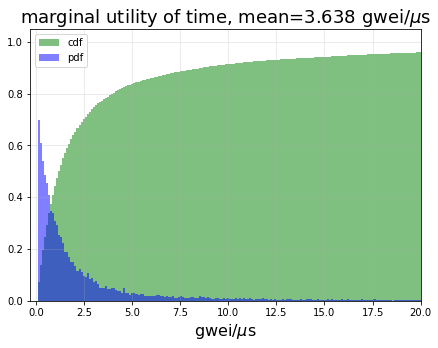

In [106]:
f, ax = plt.subplots(figsize=(7,5))

ax.hist(total/int(1e9), bins=500, color='g', alpha=0.5, cumulative=1, density=True, label='cdf')
ax.hist(total/int(1e9), bins=500, color='b', alpha=0.5, density=True, label='pdf')

ax.set_xlim(-0.3, 20)
ax.grid(alpha=0.3)
ax.set_xlabel('gwei/$\mu$s', size=16)
ax.set_title('marginal utility of time, mean={:0.3f} gwei/$\mu$s'.format(total.mean()/int(1e9)), size=18)
ax.legend()
plt.show()

In [108]:
3.638 * 1000 * 50 * 7200 * 0.2

261936000.0

In [33]:
int(timeDelta) / 1000

314556.0

In [22]:
pkdf

,slot,value,inserted_at,pk
196,5821700,67354169702000767,2023-02-18 01:40:19.168783,0xa4fb63
228,5821700,147773158952761149,2023-02-18 01:40:19.803748,0xa4fb63
252,5821700,166596908914320395,2023-02-18 01:40:20.241864,0xa4fb63
276,5821700,167024662914320395,2023-02-18 01:40:20.679674,0xa4fb63
304,5821700,166815370124124151,2023-02-18 01:40:21.084444,0xa4fb63
351,5821700,170327101842081803,2023-02-18 01:40:21.431722,0xa4fb63
398,5821700,178095813375566934,2023-02-18 01:40:21.923916,0xa4fb63
443,5821700,220171643966718279,2023-02-18 01:40:22.173799,0xa4fb63
473,5821700,234261312916737712,2023-02-18 01:40:22.423851,0xa4fb63
511,5821700,237451848280402352,2023-02-18 01:40:22.804680,0xa4fb63
